## **Missing Data**

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

plt.style.use("default")  
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "savefig.facecolor": "white"
})

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src.data.data_generation_utils import convert_date_to_datetime
from src.data.missing_data_utils import *

### **Missing Data Analysis**

In [2]:
df_nan = pd.read_csv('../datasets/data_merged_NaN.csv')
print(df_nan.columns)


Index(['date', 'label', 'GDP', 'GDP_diff', 'UNRATE', 'CPI', 'CPI_diff',
       'INDPRO', 'INDPRO_diff', 'DFF', 'DFF_diff', 'DGS10', 'DGS10_diff',
       'DGS2', 'DGS2_diff', 'T10Y2Y', 'VIX', 'DTB3', 'DTB3_diff',
       'NEWS_SENTIMENT'],
      dtype='object')


In [3]:
df_nan = convert_date_to_datetime(df_nan, 'date')

In [4]:
compute_feature_coverage(df_nan)

,feature,start_pos,end_pos,start_date,end_date,n_missing,pct_missing,coverage_days
0,label,0,230,1967-10-01,2025-04-01,0,0.000000,21002
1,DTB3,0,230,1967-10-01,2025-04-01,0,0.000000,21002
2,DGS10_diff,0,230,1967-10-01,2025-04-01,0,0.000000,21002
3,DGS10,0,230,1967-10-01,2025-04-01,0,0.000000,21002
4,DTB3_diff,0,230,1967-10-01,2025-04-01,0,0.000000,21002
5,DFF,0,230,1967-10-01,2025-04-01,0,0.000000,21002
6,INDPRO_diff,0,230,1967-10-01,2025-04-01,0,0.000000,21002
7,DFF_diff,0,230,1967-10-01,2025-04-01,0,0.000000,21002
8,CPI_diff,0,230,1967-10-01,2025-04-01,0,0.000000,21002
9,CPI,0,230,1967-10-01,2025-04-01,0,0.000000,21002


<Figure size 800x200 with 0 Axes>

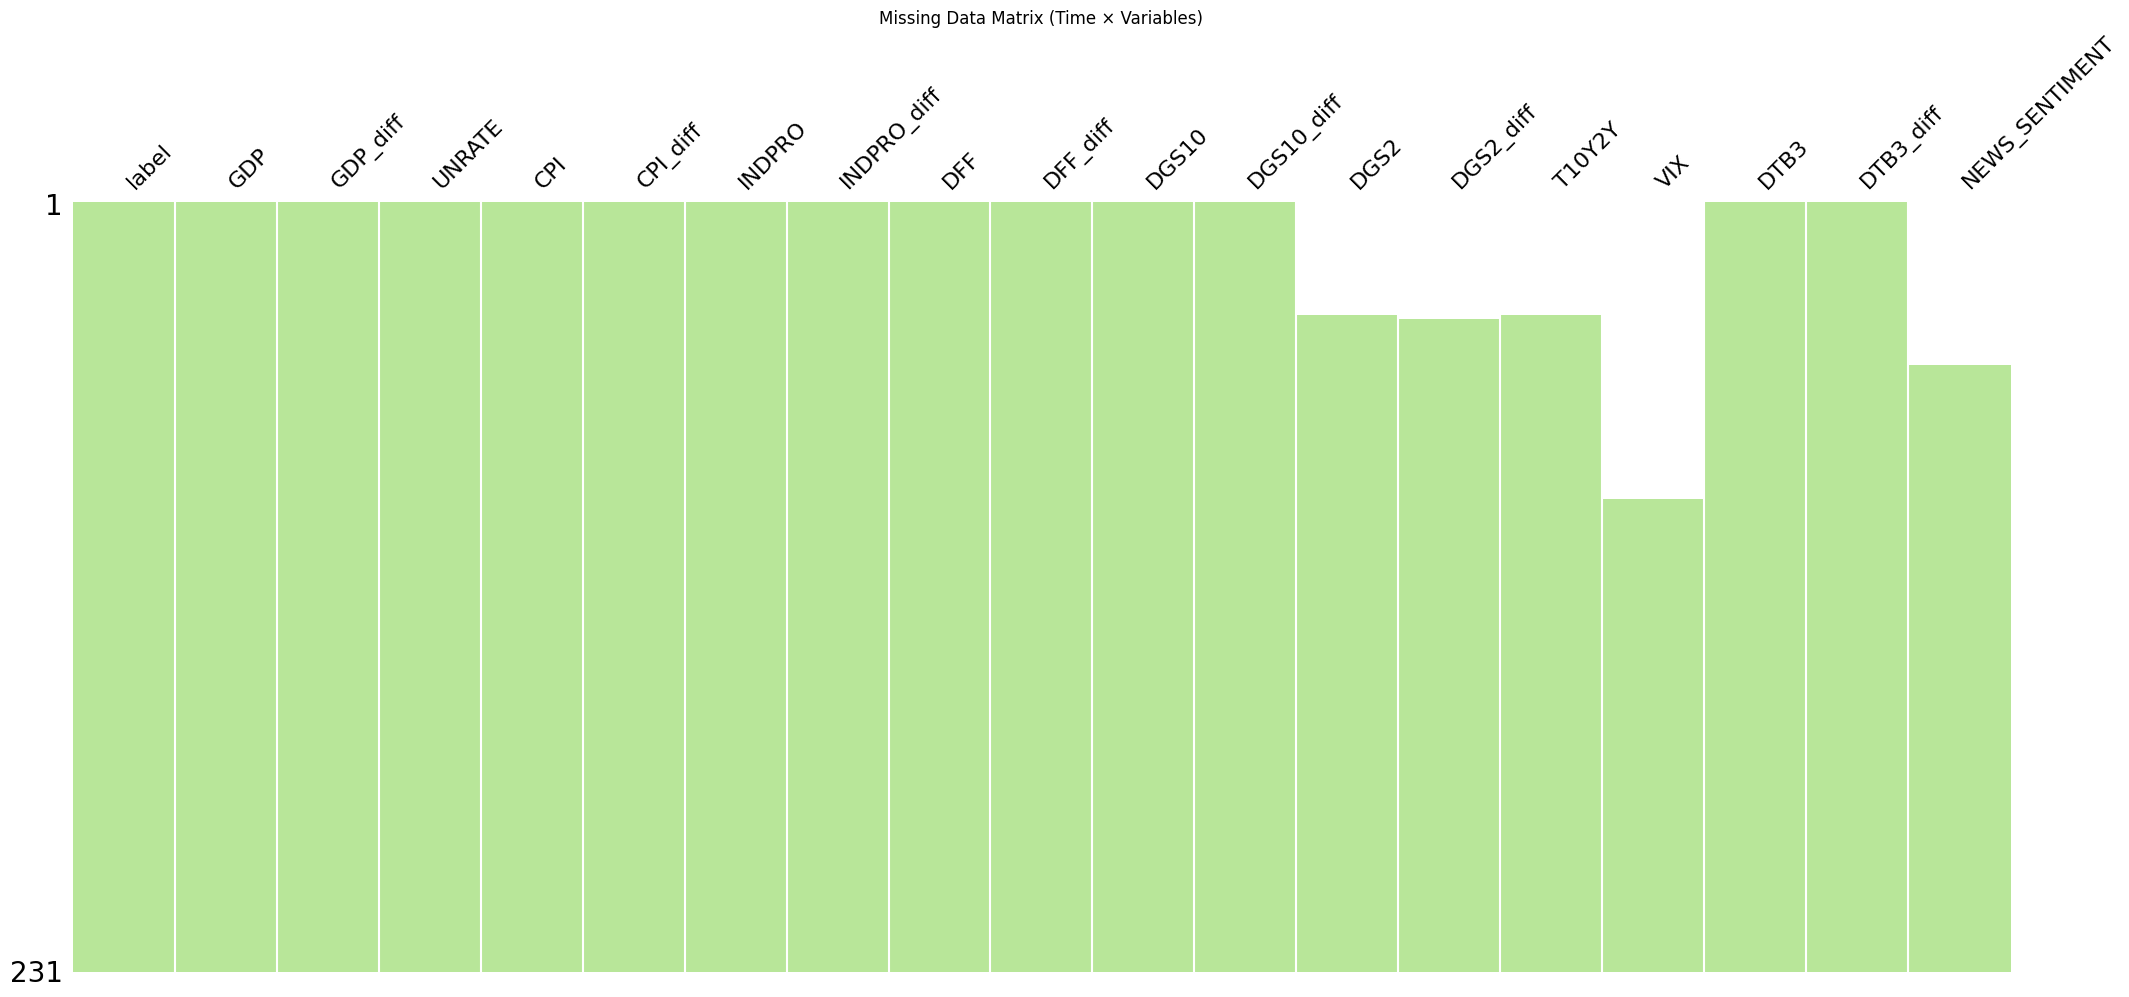

In [5]:
plt.figure(figsize=(8, 2))
msno.matrix(df_nan, sparkline=False, color = (0.722, 0.902, 0.600))
plt.title("Missing Data Matrix (Time × Variables)")
plt.show()

/Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/src/data/missing_data_utils.py:49: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isna().mean())


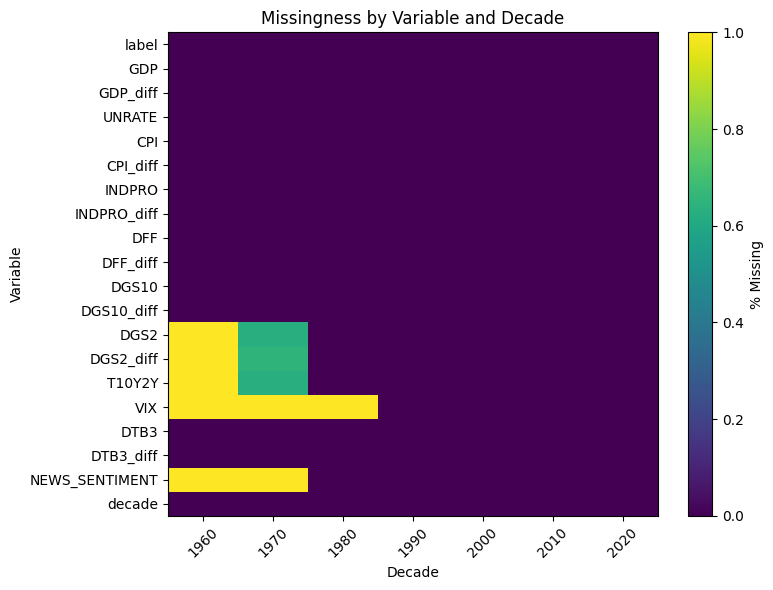

In [6]:
missing_data_by_decade = plot_missing_by_decade(df_nan)

### **Handle Missing Data**

#### **Imputation with the first known value**

In [7]:
df_imputed = prefix_impute_first_value_with_flag(df_nan)
df_imputed

,label,GDP,GDP_diff,UNRATE,CPI,CPI_diff,INDPRO,INDPRO_diff,DFF,DFF_diff,...,DFF_diff_missing,DGS10_missing,DGS10_diff_missing,DGS2_missing,DGS2_diff_missing,T10Y2Y_missing,VIX_missing,DTB3_missing,DTB3_diff_missing,NEWS_SENTIMENT_missing
date,,,,,,,,,,,,,,,,,,,,,
1967-10-01,0,881.439,16.206,3.900000,33.866667,0.366667,35.926333,0.936267,4.172826,0.280978,...,0,0,0,1,1,1,1,0,0,1
1968-01-01,0,909.387,27.948,3.733333,34.200000,0.333333,36.439167,0.512833,4.792637,0.619811,...,0,0,0,1,1,1,1,0,0,1
1968-04-01,0,934.344,24.957,3.566667,34.533333,0.333333,36.930433,0.491267,5.984286,1.191648,...,0,0,0,1,1,1,1,0,0,1
1968-07-01,0,950.825,16.481,3.533333,35.000000,0.466667,37.216967,0.286533,5.946522,-0.037764,...,0,0,0,1,1,1,1,0,0,1
1968-10-01,0,968.030,17.205,3.400000,35.433333,0.433333,37.782167,0.565200,5.918152,-0.028370,...,0,0,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,0,29147.044,438.883,4.000000,313.095667,2.121333,100.666800,0.678533,5.330000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2024-07-01,0,29511.664,364.620,4.166667,314.182667,1.087000,100.071667,-0.595133,5.264783,-0.065217,...,0,0,0,0,0,0,0,0,0,0
2024-10-01,0,29825.182,313.518,4.133333,316.538667,2.356000,99.696433,-0.375233,4.647935,-0.616848,...,0,0,0,0,0,0,0,0,0,0


In [8]:
compute_feature_coverage(df_imputed)

,feature,start_pos,end_pos,start_date,end_date,n_missing,pct_missing,coverage_days
0,label,0,230,1967-10-01,2025-04-01,0,0.0,21002
1,GDP_diff_missing,0,230,1967-10-01,2025-04-01,0,0.0,21002
2,UNRATE_missing,0,230,1967-10-01,2025-04-01,0,0.0,21002
3,CPI_missing,0,230,1967-10-01,2025-04-01,0,0.0,21002
4,CPI_diff_missing,0,230,1967-10-01,2025-04-01,0,0.0,21002
5,INDPRO_missing,0,230,1967-10-01,2025-04-01,0,0.0,21002
6,INDPRO_diff_missing,0,230,1967-10-01,2025-04-01,0,0.0,21002
7,DFF_missing,0,230,1967-10-01,2025-04-01,0,0.0,21002
8,DFF_diff_missing,0,230,1967-10-01,2025-04-01,0,0.0,21002
9,DGS10_missing,0,230,1967-10-01,2025-04-01,0,0.0,21002


<Figure size 800x200 with 0 Axes>

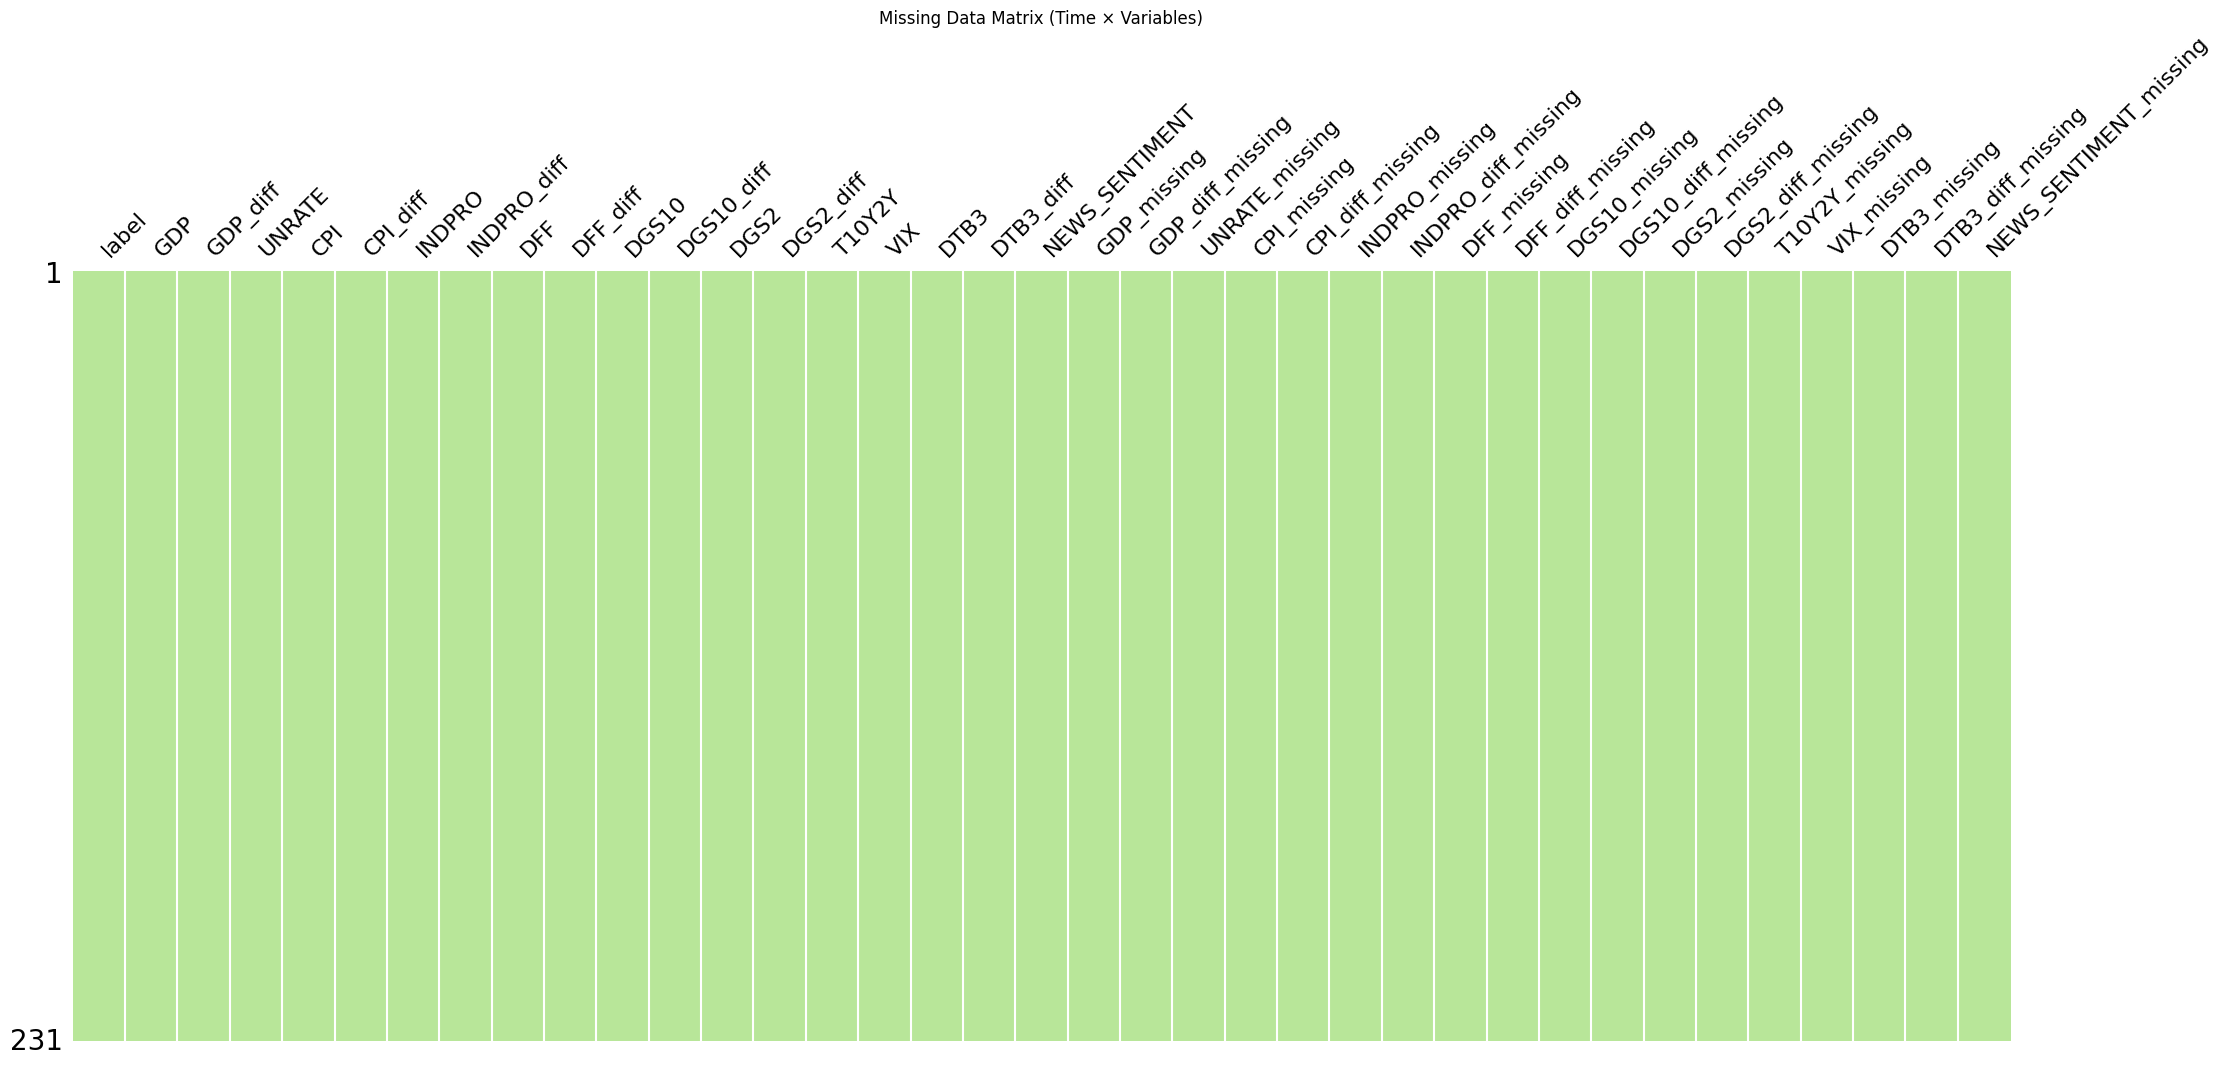

In [10]:
plt.figure(figsize=(8, 2))
msno.matrix(df_imputed, sparkline=False, color = (0.722, 0.902, 0.600))
plt.title("Missing Data Matrix (Time × Variables)")
plt.show()

/Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/src/data/missing_data_utils.py:49: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isna().mean())


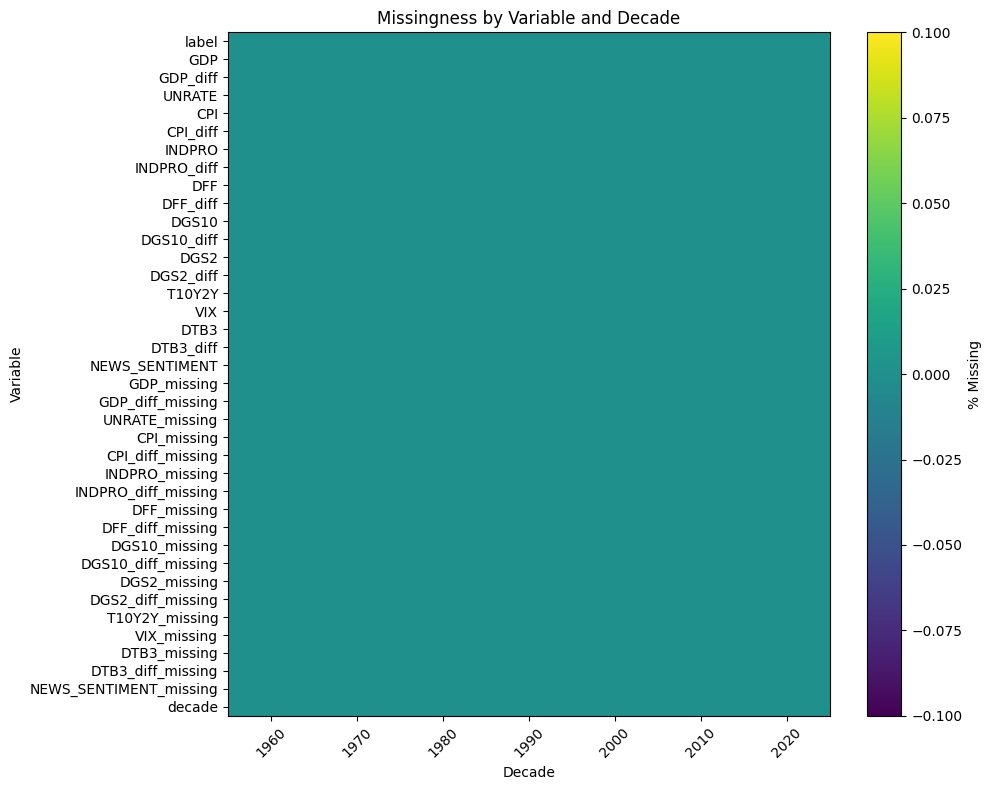

In [14]:
missing_data_by_decade = plot_missing_by_decade(df_imputed, figsize=(10, 8))

In [9]:
df_imputed.to_csv('../datasets/data_imputed.csv')